In [2]:
import pandas as pd
Football = pd.read_csv('C:/Users/eosborn3/Downloads/football_cluster.csv', index_col = 0)
Football.head()

,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
Player,,,,,,,,
1,107,166,45.3,1172,7.1,167.5,12,4
2,238,353,47.3,2829,8.0,188.7,20,4
3,207,347,41.9,2324,6.7,145.3,20,9
4,252,392,44.9,2975,7.6,198.4,22,11
5,66,119,38.9,760,6.4,152.0,4,4


In [4]:
from sklearn.preprocessing import StandardScaler

Standard = StandardScaler().fit(Football)

Football2 = pd.DataFrame(Standard.transform(Football),columns = Football.columns, index = Football.index)

Football2.head()

,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
Player,,,,,,,,
1,-0.820897,-0.929510,0.723673,-0.849334,0.195341,0.416843,-0.113494,-0.857398
2,0.963786,0.760718,1.338652,1.079029,1.245298,1.123284,0.971005,-0.857398
3,0.541456,0.706486,-0.321791,0.491326,-0.271307,-0.322920,0.971005,0.629219
4,1.154515,1.113225,0.600677,1.248939,0.778650,1.446514,1.242130,1.223866
5,-1.379462,-1.354326,-1.244260,-1.328806,-0.621292,-0.099658,-1.197993,-0.857398


In [5]:
from scipy.cluster.hierarchy import linkage

s_link = linkage(Football2, metric = 'euclidean', method = 'single')
comp_link = linkage(Football2, metric = 'euclidean', method = 'complete')
avg_link = linkage(Football2, metric = 'euclidean', method = 'average')
cent_link = linkage(Football2, metric = 'euclidean', method = 'centroid')



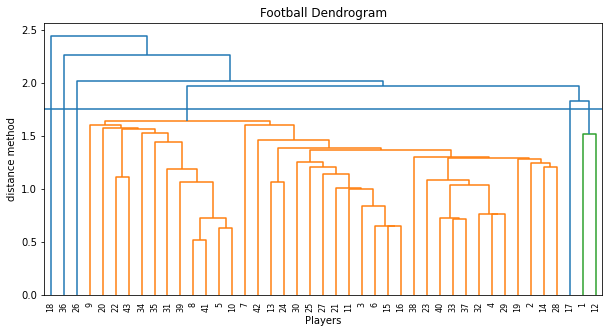

In [26]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.subplots(figsize = (10,5))
plt.title('Football Dendrogram')
plt.xlabel('Players')
plt.ylabel('distance method')
plt.axhline(y = 1.75)
dendrogram(s_link, leaf_rotation = 90, 
           labels = Football2.index)

plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler

Standard = StandardScaler().fit(Football)

Football2 = pd.DataFrame(Standard.transform(Football),columns = Football.columns, index = Football.index)

Football2.head()

,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
Player,,,,,,,,
1,-0.820897,-0.929510,0.723673,-0.849334,0.195341,0.416843,-0.113494,-0.857398
2,0.963786,0.760718,1.338652,1.079029,1.245298,1.123284,0.971005,-0.857398
3,0.541456,0.706486,-0.321791,0.491326,-0.271307,-0.322920,0.971005,0.629219
4,1.154515,1.113225,0.600677,1.248939,0.778650,1.446514,1.242130,1.223866
5,-1.379462,-1.354326,-1.244260,-1.328806,-0.621292,-0.099658,-1.197993,-0.857398


In [28]:
from sklearn.cluster import KMeans

KMMod = KMeans(n_clusters = 4, random_state = 12)

KResult = KMMod.fit(Football2)

In [34]:
print(KResult.inertia_)
print(KResult.n_iter_ )
print(KResult.labels_ )
Cluster = KResult.labels_

94.91683778377492
4
[3 0 1 0 2 1 1 2 2 2 1 3 0 0 1 1 3 1 0 2 1 1 0 0 1 3 1 0 0 1 2 0 0 2 2 2 0
 0 2 0 2 1 1]


In [36]:
Football2['Cluster'] = KResult.labels_

Football2

,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int,Cluster
Player,,,,,,,,,
1,-0.820897,-0.929510,0.723673,-0.849334,0.195341,0.416843,-0.113494,-0.857398,3
2,0.963786,0.760718,1.338652,1.079029,1.245298,1.123284,0.971005,-0.857398,0
3,0.541456,0.706486,-0.321791,0.491326,-0.271307,-0.322920,0.971005,0.629219,1
4,1.154515,1.113225,0.600677,1.248939,0.778650,1.446514,1.242130,1.223866,0
5,-1.379462,-1.354326,-1.244260,-1.328806,-0.621292,-0.099658,-1.197993,-0.857398,2
6,0.718562,0.878220,-0.260293,0.789251,0.078679,0.210243,0.428755,0.926543,1
7,-0.453062,-0.432384,-0.106549,-0.717828,-1.321264,-1.272616,-0.791306,0.629219,1
8,-1.365838,-1.345287,-1.182762,-1.327642,-0.737954,-0.936057,-1.197993,-0.857398,2
9,-1.760921,-1.724911,-2.627962,-1.771038,-2.371221,-1.992386,-1.740243,-1.452045,2
